In [1]:
import pandas as pd
import numpy as np

In [2]:
from pycaret.regression import *

In [3]:
exclude_variables = ['Posted On', 'Area Locality', 'Floor']

In [4]:
data = pd.read_csv('raw.csv')

In [5]:
s = setup(data, target='Rent',ignore_features=exclude_variables,session_id=123)

,Description,Value
0,Session id,123
1,Target,Rent
2,Target type,Regression
3,Original data shape,"(4746, 12)"
4,Transformed data shape,"(4746, 20)"
5,Transformed train set shape,"(3322, 20)"
6,Transformed test set shape,"(1424, 20)"
7,Ignore features,3
8,Numeric features,3
9,Categorical features,5


In [6]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14312.8777,5045659078.1693,54530.4814,0.4826,0.4474,0.3874,0.5620
ridge,Ridge Regression,23739.6404,5296318897.1466,56788.4579,0.4514,0.9342,1.2140,0.0160
llar,Lasso Least Angle Regression,23751.5103,5296610982.9683,56792.8031,0.4513,0.9328,1.2151,0.0140
lasso,Lasso Regression,23751.4121,5296606144.9223,56792.7289,0.4513,0.9329,1.2151,0.1990
lr,Linear Regression,23754.7578,5296784724.3862,56795.0008,0.4512,0.9324,1.2155,0.4380
lar,Least Angle Regression,23754.7578,5296784724.3862,56795.0008,0.4512,0.9324,1.2155,0.0140
br,Bayesian Ridge,24760.3761,5503810478.8511,58946.7464,0.4007,0.9512,1.2055,0.0130
en,Elastic Net,23588.8991,5550494455.1218,59565.6250,0.3815,0.9077,1.0591,0.0150
huber,Huber Regressor,16654.1362,5866915509.3811,61747.3304,0.3355,0.7612,0.4759,0.0160
gbr,Gradient Boosting Regressor,14515.2039,5599993788.4210,59799.9399,0.3182,0.4503,0.3942,0.0350


In [7]:
model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15729.0845,2865309479.0409,53528.5856,0.5977,0.4529,0.4083
1,20729.3190,35117540345.3936,187396.7458,0.0965,0.4678,0.3785
2,11704.1930,1223117783.9069,34973.1009,0.3958,0.3941,0.3276
3,15218.5313,5139500186.6716,71690.3075,-0.8983,0.4351,0.4123
4,12543.8819,1495259774.4910,38668.5890,0.5821,0.4110,0.3428
5,15424.1546,1921151666.7836,43830.9442,0.5882,0.4656,0.4135
6,11622.2436,1155172692.1405,33987.8315,0.5991,0.4170,0.3638
7,13884.5893,2337561622.0564,48348.3363,-0.1661,0.4244,0.3695
8,11437.1370,1689164180.4710,41099.4426,0.5262,0.4346,0.3283


In [8]:
best_tuned = tune_model(model, n_iter=10, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18928.6926,3961331128.4516,62939.1065,0.4438,0.6323,0.5671
1,28363.2003,36782870359.2293,191788.6085,0.0537,0.7491,0.6517
2,12706.7227,665001537.3775,25787.6237,0.6715,0.5435,0.4468
3,15799.4680,1129184161.3392,33603.3356,0.5829,0.5804,0.5111
4,14983.0539,1356169734.4584,36826.2099,0.6210,0.5270,0.4856
5,18117.8063,1713976754.0732,41400.2023,0.6326,0.6933,0.5426
6,16620.3782,1844275104.0583,42945.0242,0.3600,0.5940,0.5332
7,13773.2464,834609470.1010,28889.6083,0.5837,0.5431,0.5158
8,16634.9177,2101388636.8020,45840.9057,0.4106,0.6402,0.5317


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [9]:
evaluate_model(best_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

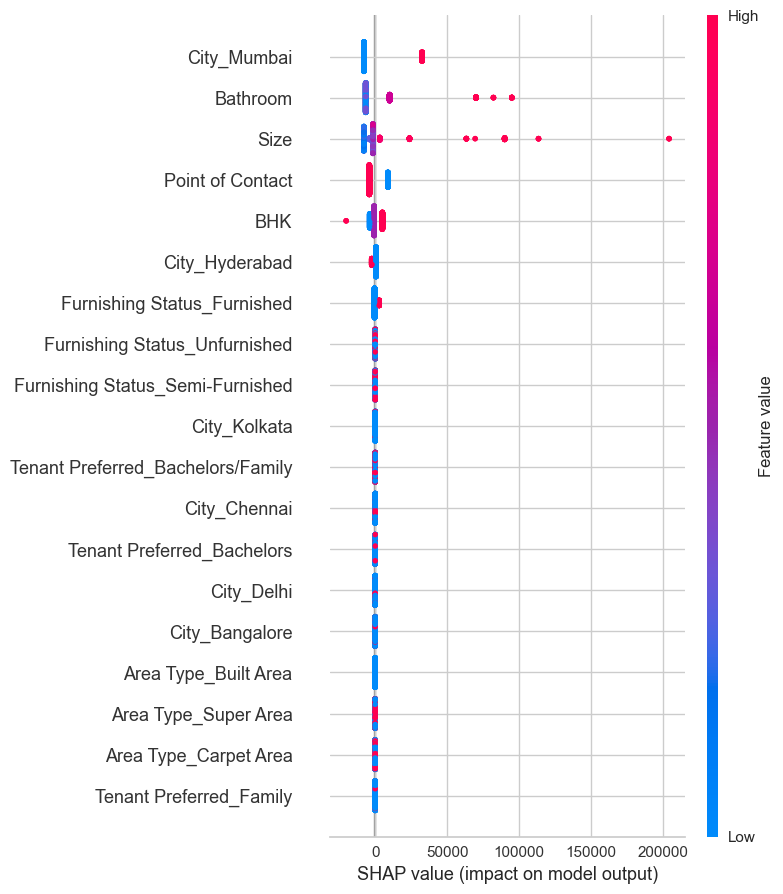

In [10]:
interpret_model(best_tuned)

In [11]:
final = finalize_model(best_tuned)

In [12]:
final

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['BHK', 'Size', 'Bathroom'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Area Type', 'City',
                                             'Furnishing Status',
                                             'Tenant Preferred',
                                             'Point of Contact'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 Tra...
                 TransformerWrapper(include=['Area Type', 'City',
                                             'Furnishing Status',
                                             'Tenant Preferred'],
                                    transformer=OneHotEncoder(cols=['Area Type',
                                                                    'City',
                                                                    'Furnishing '
                                                                    'Status',
                                                                    'Tenant '
                                                                    'Preferred'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x3423fc040>)])

In [13]:
predt_holdout = predict_model(best_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,16244.2954,1505281566.3384,38797.9583,0.5888,0.6211,0.5807


In [14]:
save_model(best_tuned, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['BHK', 'Size', 'Bathroom'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Area Type', 'City',
                                              'Furnishing Status',
                                              'Tenant Preferred',
                                              'Point of Contact'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  Tra...
                  TransformerWrapper(include=['Area Type', 'City',
                                              'Furnishing Status',
                                              'Tenant Preferred'],
                                     transformer=OneHotEncoder(cols=['Area Type',
                                 